### Date and Time Functions and Plotting Time Series
One thing that is more complicated then we would like but is a common need for a data scientist is encoding data and time. Computer operating systems like Windows and Linux use as a reference point or epoch January 1, 1970 and determine the number of seconds since midnight the start of 1970 to do time computations.

In [9]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [10]:
COVID_data = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us.csv'
COVID=Table.read_table(COVID_data)
COVID=COVID.set_format(0, DateFormatter(format='%Y-%m-%d',))

Try to sort data by dates

In [11]:
COVID.sort("date",descending=True) # Why does this sort this way?

date,geoid,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
2022-01-31,USA,660923,456871,137.69,2568,2558.35,0.77
2022-01-30,USA,104085,519421,156.54,361,2534,0.76
2022-01-29,USA,246791,537169,161.89,1347,2571.46,0.77
2022-01-28,USA,550853,555076,167.29,3838,2529.58,0.76
2022-01-27,USA,529815,591020,178.12,3091,2531.25,0.76
2022-01-26,USA,686136,618231,186.32,3895,2465.59,0.74
2022-01-25,USA,510913,650010,195.9,2972,2362.33,0.71
2022-01-24,USA,1032159,665800,200.66,2179,2083.18,0.63
2022-01-23,USA,199481,692438,208.68,571,2182.34,0.66
2022-01-22,USA,337384,705904,212.74,934,2152.34,0.65


In [12]:
import time                # Python time functions
from time import strptime 
time.time() # Seconds since common epoch

1643723408.178895

In [15]:
time1 = time.mktime(strptime('2021-11-01', '%Y-%m-%d'))
time1

1635739200.0

###  Select table data by dates 
Select 2021 data

In [17]:
time1 = time.mktime(strptime('2021-1-01', '%Y-%m-%d'))
time2 = time.mktime(strptime('2021-12-31', '%Y-%m-%d')) # Seconds since epoch
print(time1, time2)

1609477200.0 1640926800.0


In [18]:
C2021 = COVID.where(0,are.between(time1,time2))
C2021

date,geoid,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
2021-01-01,USA,147248,195605,58.95,1920,2507.56,0.76
2021-01-02,USA,291610,205235,61.85,2373,2586.62,0.78
2021-01-03,USA,201780,212411,64.02,1351,2606.8,0.79
2021-01-04,USA,251830,215016,64.8,2049,2652.15,0.8
2021-01-05,USA,235016,220002,66.3,3689,2660.99,0.8
2021-01-06,USA,255966,224018,67.51,3964,2688.15,0.81
2021-01-07,USA,280334,230965,69.61,4113,2765.7,0.83
2021-01-08,USA,300777,244361,73.64,3895,2942.48,0.89
2021-01-09,USA,251919,246656,74.34,3259,3173.8,0.96
2021-01-10,USA,208295,247582,74.62,1777,3217.65,0.97


### Plotting with Python using matplotlib.dates
Special plotting functionality for dates

In [23]:
# see https://www.geeksforgeeks.org/matplotlib-pyplot-plot_date-in-python/
import datetime as dt
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
date1 = dt.datetime(2020, 4, 2)
date2 = dt.datetime(2020, 4, 6)
delta = dt.timedelta(hours = 6)
dates = drange(date1, date2, delta)

In [24]:
now = dt.datetime.now()
now

datetime.datetime(2022, 1, 29, 19, 5, 14, 471360)

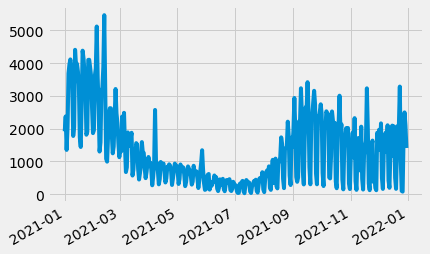

In [20]:
# Input Data as arrays
dates = C2021.column('date')  
deaths = C2021.column('deaths') 
# https://matplotlib.org/stable/api/dates_api.html
#import matplotlib.pyplot as plt
import matplotlib.dates as mdates
sec = mdates.epoch2num(dates)
date_fmt = '%d-%m-%y'
loc = mdates.AutoDateLocator()
fmt = mdates.AutoDateFormatter(loc)
plt.gca().xaxis.set_major_formatter(fmt)
plt.gca().xaxis.set_major_locator(loc)
plt.plot(sec,deaths)
plt.gcf().autofmt_xdate()